In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# New Section

In [2]:
df = pd.read_csv("DataSampled.csv")

In [3]:
df

,datetime,tile_id,city,app,day,hour,traffic,time
0,2019-03-21 00:00:00,60163,Lyon,Instagram,20190321,0,110102,0:00
1,2019-03-21 03:00:00,71940,Lyon,Instagram,20190321,3,6625,3:00
2,2019-03-21 02:00:00,64491,Lyon,Instagram,20190321,2,7456,2:00
3,2019-03-21 00:00:00,75638,Lyon,Instagram,20190321,0,93423,0:00
4,2019-03-21 01:00:00,48340,Lyon,Instagram,20190321,1,17014,1:00
...,...,...,...,...,...,...,...,...
39995,2019-03-24 20:00:00,109966,Paris,Instagram,20190324,20,310874,20:00
39996,2019-03-24 19:00:00,119969,Paris,Instagram,20190324,19,399546,19:00
39997,2019-03-24 19:00:00,95236,Paris,Instagram,20190324,19,1953400,19:00
39998,2019-03-24 20:00:00,105718,Paris,Instagram,20190324,20,106894,20:00


# Data Preprocessing

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  40000 non-null  datetime64[ns]
 1   tile_id   40000 non-null  int64         
 2   city      40000 non-null  object        
 3   app       40000 non-null  object        
 4   day       40000 non-null  int64         
 5   hour      40000 non-null  int64         
 6   traffic   40000 non-null  int64         
 7   time      40000 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 2.4+ MB


In [6]:
# check duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
# remove Features that is useless
df.drop(['hour','time','day'],axis=1, inplace=True)
df

,datetime,tile_id,city,app,traffic
0,2019-03-21 00:00:00,60163,Lyon,Instagram,110102
1,2019-03-21 03:00:00,71940,Lyon,Instagram,6625
2,2019-03-21 02:00:00,64491,Lyon,Instagram,7456
3,2019-03-21 00:00:00,75638,Lyon,Instagram,93423
4,2019-03-21 01:00:00,48340,Lyon,Instagram,17014
...,...,...,...,...,...
39995,2019-03-24 20:00:00,109966,Paris,Instagram,310874
39996,2019-03-24 19:00:00,119969,Paris,Instagram,399546
39997,2019-03-24 19:00:00,95236,Paris,Instagram,1953400
39998,2019-03-24 20:00:00,105718,Paris,Instagram,106894


In [8]:
df.set_index("datetime", inplace=True)
df

,tile_id,city,app,traffic
datetime,,,,
2019-03-21 00:00:00,60163,Lyon,Instagram,110102
2019-03-21 03:00:00,71940,Lyon,Instagram,6625
2019-03-21 02:00:00,64491,Lyon,Instagram,7456
2019-03-21 00:00:00,75638,Lyon,Instagram,93423
2019-03-21 01:00:00,48340,Lyon,Instagram,17014
...,...,...,...,...
2019-03-24 20:00:00,109966,Paris,Instagram,310874
2019-03-24 19:00:00,119969,Paris,Instagram,399546
2019-03-24 19:00:00,95236,Paris,Instagram,1953400


In [9]:
def get_time_category(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:  # 21:00-4:59
        return "Night"

# Calculate Paris/Lyon local hour (without changing original data)
df['paris_hour'] = (
    df.index
    .tz_localize('UTC')
    .tz_convert('Europe/Paris')
    .hour
)

df['day_time'] = df['paris_hour'].apply(get_time_category)
df = df.drop(columns=['paris_hour'])
df

,tile_id,city,app,traffic,day_time
datetime,,,,,
2019-03-21 00:00:00,60163,Lyon,Instagram,110102,Night
2019-03-21 03:00:00,71940,Lyon,Instagram,6625,Night
2019-03-21 02:00:00,64491,Lyon,Instagram,7456,Night
2019-03-21 00:00:00,75638,Lyon,Instagram,93423,Night
2019-03-21 01:00:00,48340,Lyon,Instagram,17014,Night
...,...,...,...,...,...
2019-03-24 20:00:00,109966,Paris,Instagram,310874,Night
2019-03-24 19:00:00,119969,Paris,Instagram,399546,Evening
2019-03-24 19:00:00,95236,Paris,Instagram,1953400,Evening


In [10]:
# Apply One-Hot-Encoding to Categorical Features
#use get dummies instead
encoded_df = pd.get_dummies(df,columns=['app','city','day_time'])

In [11]:
encoded_df

,tile_id,traffic,app_Instagram,app_YouTube,city_Lyon,city_Paris,day_time_Afternoon,day_time_Evening,day_time_Morning,day_time_Night
datetime,,,,,,,,,,
2019-03-21 00:00:00,60163,110102,True,False,True,False,False,False,False,True
2019-03-21 03:00:00,71940,6625,True,False,True,False,False,False,False,True
2019-03-21 02:00:00,64491,7456,True,False,True,False,False,False,False,True
2019-03-21 00:00:00,75638,93423,True,False,True,False,False,False,False,True
2019-03-21 01:00:00,48340,17014,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
2019-03-24 20:00:00,109966,310874,True,False,False,True,False,False,False,True
2019-03-24 19:00:00,119969,399546,True,False,False,True,False,True,False,False
2019-03-24 19:00:00,95236,1953400,True,False,False,True,False,True,False,False


In [12]:
# save encoded data to csv file
encoded_df.to_csv('data_traffic.csv')

In [13]:
scaled_encoded_df = encoded_df.copy()
scaled_encoded_df['traffic'] = (encoded_df['traffic'] - encoded_df['traffic'].mean()) / encoded_df['traffic'].std()
scaled_encoded_df['tile_id'] = (encoded_df['tile_id'] - encoded_df['tile_id'].mean()) / encoded_df['tile_id'].std()
scaled_encoded_df

,tile_id,traffic,app_Instagram,app_YouTube,city_Lyon,city_Paris,day_time_Afternoon,day_time_Evening,day_time_Morning,day_time_Night
datetime,,,,,,,,,,
2019-03-21 00:00:00,-0.420183,-0.253829,True,False,True,False,False,False,False,True
2019-03-21 03:00:00,0.020857,-0.390148,True,False,True,False,False,False,False,True
2019-03-21 02:00:00,-0.258102,-0.389053,True,False,True,False,False,False,False,True
2019-03-21 00:00:00,0.159345,-0.275802,True,False,True,False,False,False,False,True
2019-03-21 01:00:00,-0.862946,-0.376462,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
2019-03-24 20:00:00,1.444905,0.010664,True,False,False,True,False,False,False,True
2019-03-24 19:00:00,1.819510,0.127479,True,False,False,True,False,True,False,False
2019-03-24 19:00:00,0.893276,2.174498,True,False,False,True,False,True,False,False


In [14]:
# save scaled df in csv file
scaled_encoded_df.to_csv('s_data_traffic.csv')

# **EDA**

<Axes: xlabel='traffic', ylabel='Count'>

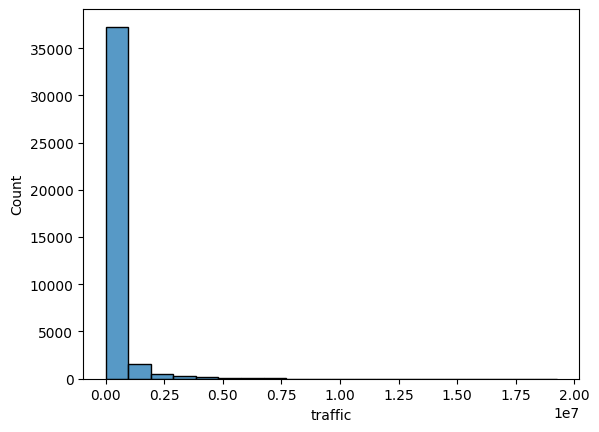

In [15]:
sns.histplot(df.traffic,bins=20)

In [16]:
n_df = df[df['app'] == 'Instagram']
n_df

,tile_id,city,app,traffic,day_time
datetime,,,,,
2019-03-21 00:00:00,60163,Lyon,Instagram,110102,Night
2019-03-21 03:00:00,71940,Lyon,Instagram,6625,Night
2019-03-21 02:00:00,64491,Lyon,Instagram,7456,Night
2019-03-21 00:00:00,75638,Lyon,Instagram,93423,Night
2019-03-21 01:00:00,48340,Lyon,Instagram,17014,Night
...,...,...,...,...,...
2019-03-24 20:00:00,109966,Paris,Instagram,310874,Night
2019-03-24 19:00:00,119969,Paris,Instagram,399546,Evening
2019-03-24 19:00:00,95236,Paris,Instagram,1953400,Evening


In [17]:
n_df = n_df[n_df['city'] == 'Lyon']
n_df

,tile_id,city,app,traffic,day_time
datetime,,,,,
2019-03-21 00:00:00,60163,Lyon,Instagram,110102,Night
2019-03-21 03:00:00,71940,Lyon,Instagram,6625,Night
2019-03-21 02:00:00,64491,Lyon,Instagram,7456,Night
2019-03-21 00:00:00,75638,Lyon,Instagram,93423,Night
2019-03-21 01:00:00,48340,Lyon,Instagram,17014,Night
...,...,...,...,...,...
2019-03-24 18:00:00,71417,Lyon,Instagram,118428,Evening
2019-03-24 18:00:00,105173,Lyon,Instagram,11572,Evening
2019-03-24 20:00:00,49877,Lyon,Instagram,44243,Night


In [18]:
n_df = n_df.resample('h')['traffic'].mean().reset_index()
n_df.set_index(n_df.datetime,inplace = True)
n_df

,datetime,traffic
datetime,,
2019-03-21 00:00:00,2019-03-21 00:00:00,90840.824561
2019-03-21 01:00:00,2019-03-21 01:00:00,48031.346939
2019-03-21 02:00:00,2019-03-21 02:00:00,14355.679389
2019-03-21 03:00:00,2019-03-21 03:00:00,12670.210526
2019-03-21 04:00:00,2019-03-21 04:00:00,10987.937500
...,...,...
2019-03-24 19:00:00,2019-03-24 19:00:00,260382.346939
2019-03-24 20:00:00,2019-03-24 20:00:00,172845.916031
2019-03-24 21:00:00,2019-03-24 21:00:00,192331.484211


In [19]:
n_df.drop('datetime',axis=1, inplace=True)
n_df

,traffic
datetime,
2019-03-21 00:00:00,90840.824561
2019-03-21 01:00:00,48031.346939
2019-03-21 02:00:00,14355.679389
2019-03-21 03:00:00,12670.210526
2019-03-21 04:00:00,10987.937500
...,...
2019-03-24 19:00:00,260382.346939
2019-03-24 20:00:00,172845.916031
2019-03-24 21:00:00,192331.484211


<Axes: xlabel='datetime'>

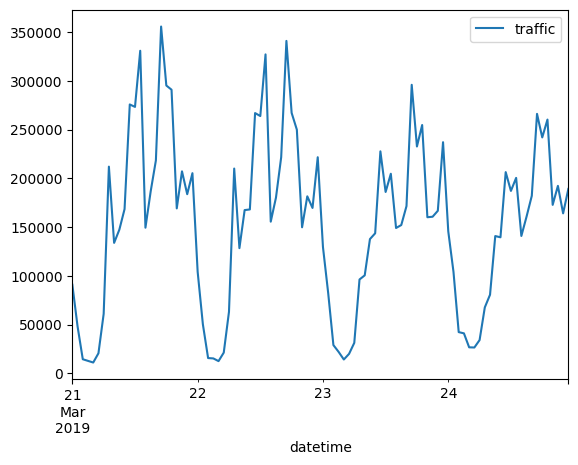

In [20]:
n_df.plot()